# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandasql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

from pandasql import sqldf
from statsmodels.stats.weightstats import ztest  
from scipy.stats import norm

Ось так можемо переглянути, які є листки в Excel файлі:

In [4]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = "C:\My Data\Python_Data analyst\Final Project\Grocery Database.xlsx"

In [5]:
xl = pd.ExcelFile(path_to_file)

In [6]:
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [7]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [8]:
df = xl.parse('Grosto DB')
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [10]:
print(f"Набір даних містить {df.shape[0]} рядків та {df.shape[1]} колонок.")

Набір даних містить 50447 рядків та 32 колонок.


In [11]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

В даних немає пропущених значень.

In [12]:
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

1. Яка кількість унікальних чеків у базі даних?

In [13]:
df['Receipt Number'].nunique()

13048

Яка кількість унікальних чеків у базі даних? Виконати запит за допомогою SQL для Pandas.

In [34]:
sqldf('SELECT COUNT(DISTINCT [Receipt Number]) as Count FROM df')

,Count
0,13048


2. Перевірка бази даних.

Переглядаючи БД було помічено, що стовпець "Net Bill Amount" не завжди дорівнює сумі значень стовпця "Amount" для кожного унікального чеку, коли кількість позицій у чеку більше однієї. Дане питання виникло у зв"язку з цікавістю розрахунку величин у стовпцях "Net Bill Amount" та "Gross Bill Amount", а також решти стовпців, які приймають участь у розрахунку попередньо зазначених.

In [49]:
df_amount = df.groupby('Receipt Number')['Amount'].sum()
df_amount

Receipt Number
GIJ00001    12.1128
GIJ00002    22.9680
GIJ00003    30.7692
GIJ00004    24.2452
GIJ00005     6.1275
             ...   
GSW01531    21.1848
GSW01532     9.4090
GSW01533    74.1664
GSW01534    10.5536
GSW01535    14.0184
Name: Amount, Length: 13048, dtype: float64

In [50]:
df_unique = df[['Receipt Number', 'Net Bill Amount']].drop_duplicates()
df_unique

,Receipt Number,Net Bill Amount
0,GIJ00001,12.1128
1,GIJ00002,22.9680
2,GIJ00003,38.3526
8,GIJ00004,21.1974
12,GIJ00005,6.1275
...,...,...
50435,GSW01531,21.1848
50436,GSW01532,9.4090
50437,GSW01533,74.1664
50443,GSW01534,10.5536


In [51]:
merged_df = pd.merge(df_amount, df_unique, on='Receipt Number')
merged_df

,Receipt Number,Amount,Net Bill Amount
0,GIJ00001,12.1128,12.1128
1,GIJ00002,22.9680,22.9680
2,GIJ00003,30.7692,38.3526
3,GIJ00004,24.2452,21.1974
4,GIJ00005,6.1275,6.1275
...,...,...,...
13043,GSW01531,21.1848,21.1848
13044,GSW01532,9.4090,9.4090
13045,GSW01533,74.1664,74.1664
13046,GSW01534,10.5536,10.5536


In [52]:
merged_df['Difference'] = merged_df['Amount'] - merged_df['Net Bill Amount']
merged_df

,Receipt Number,Amount,Net Bill Amount,Difference
0,GIJ00001,12.1128,12.1128,0.000000e+00
1,GIJ00002,22.9680,22.9680,0.000000e+00
2,GIJ00003,30.7692,38.3526,-7.583400e+00
3,GIJ00004,24.2452,21.1974,3.047800e+00
4,GIJ00005,6.1275,6.1275,0.000000e+00
...,...,...,...,...
13043,GSW01531,21.1848,21.1848,0.000000e+00
13044,GSW01532,9.4090,9.4090,0.000000e+00
13045,GSW01533,74.1664,74.1664,1.421085e-14
13046,GSW01534,10.5536,10.5536,0.000000e+00


In [53]:
merged_df['Difference'].value_counts()

 0.000000e+00    8521
 1.421085e-14     381
-1.421085e-14     373
-7.105427e-15     336
 7.105427e-15     287
                 ... 
-3.539520e+01       1
-6.140100e+00       1
-3.019500e+00       1
-7.286400e+00       1
-3.743600e+01       1
Name: Difference, Length: 2787, dtype: int64

In [54]:
percentage_df = merged_df['Difference'].value_counts(normalize=True) * 100
percentage_df

 0.000000e+00    65.305028
 1.421085e-14     2.919988
-1.421085e-14     2.858676
-7.105427e-15     2.575107
 7.105427e-15     2.199571
                   ...    
-3.539520e+01     0.007664
-6.140100e+00     0.007664
-3.019500e+00     0.007664
-7.286400e+00     0.007664
-3.743600e+01     0.007664
Name: Difference, Length: 2787, dtype: float64

За рахунок проведеного вище аналізу можна зробити висновок, що для унікальної кількості чеків у БД (13048) значення стовпця "Net Bill Amount" дорівнюють сумі значень стовпця "Amount", коли кількість позицій у чеку більше однієї лише для 65% даних, решта значень мають відхилення у різну сторону.
Але було прийнято рішення не створювати новий розрахунковий стовпець "Net Bill Amount" та фактичний "Net Bill Amount", а працювати з наявною БД, оскільки ми не знаємо на якому етапі дані було викривлено і чому.

3. Яка кількість позицій товару у кожному з унікальних чеків? Зробити візуалізацію розподілу.

In [17]:
receipt_counts = df["Receipt Number"].value_counts()
count_of_receipts = receipt_counts.value_counts()
count_of_receipts

1     4004
2     1557
6     1228
5     1225
7     1147
4     1131
3     1131
8      942
9      515
10     151
12       7
11       5
14       2
13       2
16       1
Name: Receipt Number, dtype: int64

Як бачимо з таблиці вище найбільше чеків мають 1 позицію у чеку, на другому місці - 2 позиції, на третьму місці - 6 позицій у чеку, і лише один чек має 16 позицій у чеку.

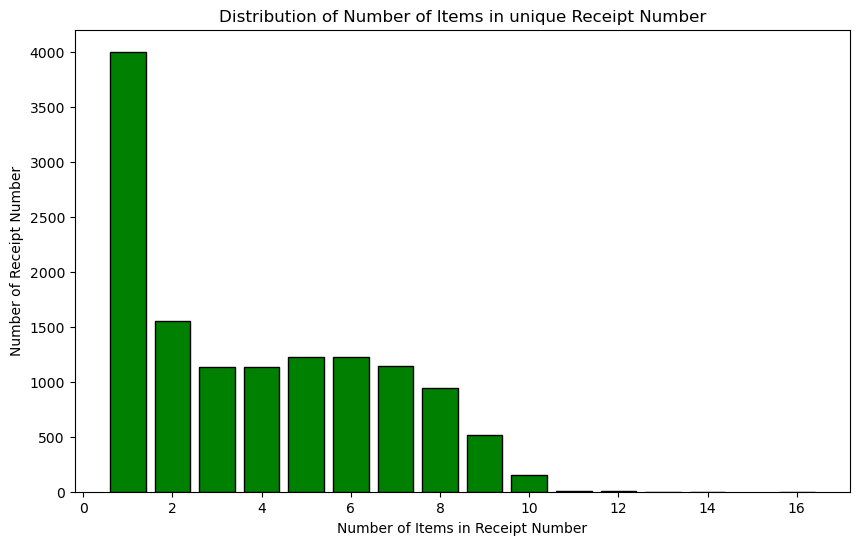

In [67]:
plt.figure(figsize = (10, 6))
plt.bar(count_of_receipts.index, count_of_receipts.values, color = 'green', edgecolor ='black')
plt.xlabel('Number of Items in Receipt Number')
plt.ylabel('Number of Receipt Number')
plt.title('Distribution of Number of Items in unique Receipt Number')
plt.show();

4. Які товари було придбано у чеку з максимальною кількість позицій номенклатури?

In [35]:
receipt_max = receipt_counts.idxmax()
receipt_max

'GIJ00364'

In [36]:
df[df['Receipt Number'] == 'GIJ00364']['Items']

1260                        Seasame instant noodles
1261    Antibacteria baby accessories and vegetable
1262                     Red berries and lime cider
1263                          Hydro boost water gel
1264                      ThyGrace Romanine lettuce
1265             Eclipse Sugarfree peppermint Mints
1266                               Oil control film
1267                          Lavender Air freshner
1268      Orville Redenbacher's Butter Flavor chips
1269                            Strawberry Mini Bar
1270                                      Hazelnut 
1271                               Koka Egg noodles
1272                         OOB Apple mango frozen
1273                   3 in 1 cereal drink original
1274                   Erdinger Blonde premium beer
1275              Monster Ultra violet energy drink
Name: Items, dtype: object

Для деяких подальших розрахунків має сенс створити df_unique, який міститиме унікальні Receipt Number, щоб не задублювати дані. В подальшому ми будемо використовувати оригінальний df та df_unique.

In [39]:
df_unique = df.drop_duplicates(subset='Receipt Number')
df_unique.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,...,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968
12,GIJ00005,2016-01-03,2016,1,15:47:23.141000,9873085193,MIDID0005,1,49,Male,...,0.1,6.74025,Cash,Philippine National bank,0.088,0.15,0.762,0.56760,0.9675,4.91490


5. Який розмір середнього чеку в залежності від статі та чи є ця різниця статистично значимою?

Перед проведенням z-test перевіримо нашу вибірку на нормальність. Побудуємо розподіл даних та лінійний графік щільності (PDF) нормального розподілу з середнім та стандартним відхиленням як у наших даних.

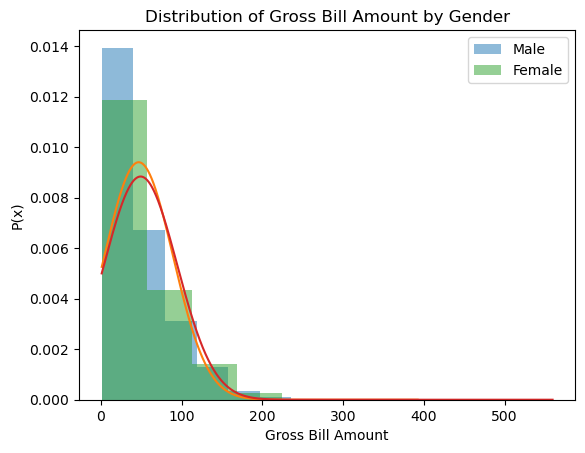

In [68]:
genders = df_unique['Gender'].unique()

for gender in genders:
    data = df_unique[df_unique['Gender'] == gender]['Gross Bill Amount']
    x_axis = np.arange(data.min(), data.max(), 0.01)
    plt.hist(data, density = True, alpha = 0.5, label = f'{gender}')
    plt.plot(x_axis, norm.pdf(x_axis, data.mean(), data.std()))

plt.xlabel('Gross Bill Amount')
plt.ylabel('P(x)')
plt.title('Distribution of Gross Bill Amount by Gender')
plt.legend()
plt.show();

Схоже, що розподіл наших даних є нормальним Гаусівським, але більше скошеним вправо.

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є Q-Q графік. Побудуймо його і зробімо висновки про розподіл.

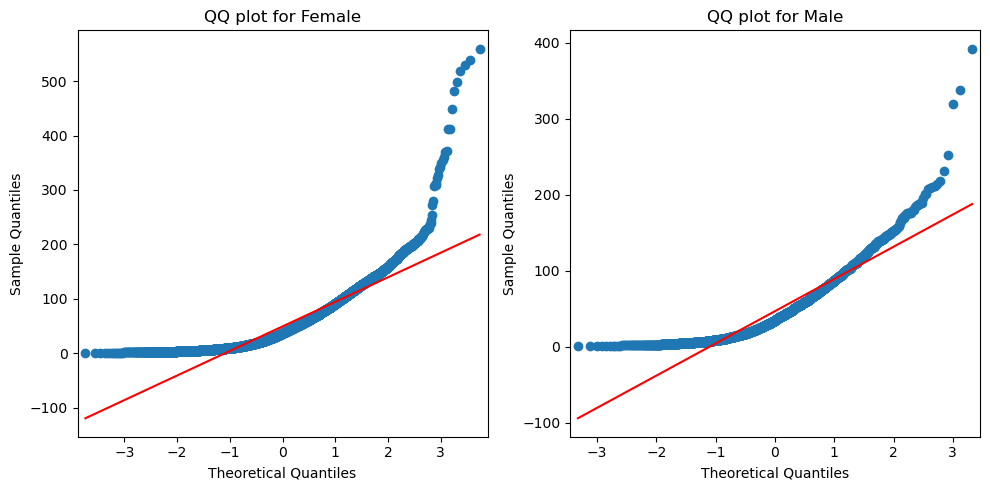

In [69]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

data_female = df_unique[df_unique['Gender'] == 'Female']['Gross Bill Amount']
sm.qqplot(data_female, line = 's', ax = axs[0])
axs[0].set_title('QQ plot for Female')

data_male = df_unique[df_unique['Gender'] == 'Male']['Gross Bill Amount']
sm.qqplot(data_male, line = 's', ax = axs[1])
axs[1].set_title('QQ plot for Male')

plt.tight_layout()
plt.show();

Згідно графіку розподіл є нормальним Гаусівським, скошеним вправо. Ми маємо багато викидів даних на екстремальних значеннях.

Проведімо z-test та зробімо висновки.

In [40]:
df_unique.groupby('Gender')['Gross Bill Amount'].mean()

Gender
Female    49.202382
Male      46.840776
Name: Gross Bill Amount, dtype: float64

In [42]:
female_gross_bill = df_unique[df_unique['Gender'] == 'Female']['Gross Bill Amount']
male_gross_bill = df_unique[df_unique['Gender'] == 'Male']['Gross Bill Amount']

ztest_score, p_value = ztest(female_gross_bill, male_gross_bill, value=0)
p_value

0.02232799974090033

In [43]:
ztest_score

2.2847413285630718

Як ми бачимо розмір середнього чеку для жінок - 49.20, а для чоловіків - 46.84.

Р-value складає 0.022, що значно менше загально прийнятого рівня статистичної значущості 0.05. Це означає, що ми можемо відхилити нульову гіпотезу про те, що немає різниці між середніми чеками для чоловіків та жінок (що ми й так бачимо по середнім значеням у таблиці вище). 

ztest_score дорівнює 2.28, що є показником виміру скільки є стандартних  відхилень від середнього. Позитивний z-score вказує на те, що наші дані є вищими, ніж середнє.  

Отже, базуючись на цьому аналізі, ми можемо зробити висновки, що різниця між середнім чеком жінок та середнім чеком чоловіків є статистично значимо, жінки мають вищий середній чек. 

6. Який розподіл способів оплати чеку в залежності від міста? Зробити візуалізацію.

Відповідь на данне питання може бути цікавою бізнесу з точки зору, наприклад, стимулювання якогось типу з оплат у місті, або за умови оплати одним з видів платіжного засобу, який найменш популярний у данному місті можна запропонувати клієнту знижку на весь чек. Дана інформація може бути цікавою власникам торговельної мережі при їх взаємодії з банківськими установами, щоб наприклад, простимулювати оплати картками тощо. Прикладом цього в Україні є співпраця банку Восток та торгівельної мережі Сільпо, банку Райфайзен та мережі АТБ, які надають знижку при оплаті карткою їх банку.

In [66]:
df_unique = df.drop_duplicates(subset = 'Receipt Number')
pivot = df_unique.pivot_table(index = 'City', columns = 'Payment Mode', values = 'Gross Bill Amount', aggfunc = 'count')
pivot

Payment Mode,Card,Cash,Wallet
City,,,
Bedok,1075,1049,1040
Jakarta,749,875,795
Kuala Lumpur,1002,821,1013
Manila,1052,1045,997
Woodlands,529,458,548


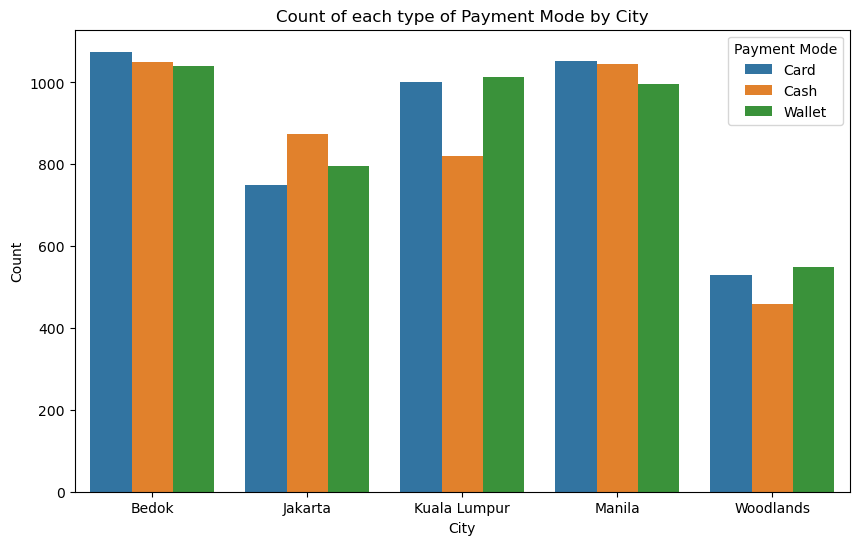

In [70]:
pivot_reset = pivot.reset_index()
pivot_melted = pivot_reset.melt(id_vars = 'City', var_name = 'Payment Mode', value_name = 'Count')
plt.figure(figsize = (10, 6))
sns.barplot(x = 'City', y = 'Count', hue = 'Payment Mode', data = pivot_melted)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of each type of Payment Mode by City')
plt.show();

7. Яку кількість чеків у кожному з міст було зроблено в залежності від статі? Зробити візуалізацію. 

Дану інформацію можна використовувати з метою стимулювання продажів для статі, яка менше купує у даній торговій мережі.

In [61]:
df_unique.groupby(['City', 'Gender']).size()

City          Gender
Bedok         Female    2846
              Male       318
Jakarta       Female    1950
              Male       469
Kuala Lumpur  Female    2134
              Male       702
Manila        Female    2391
              Male       703
Woodlands     Female    1467
              Male        68
dtype: int64

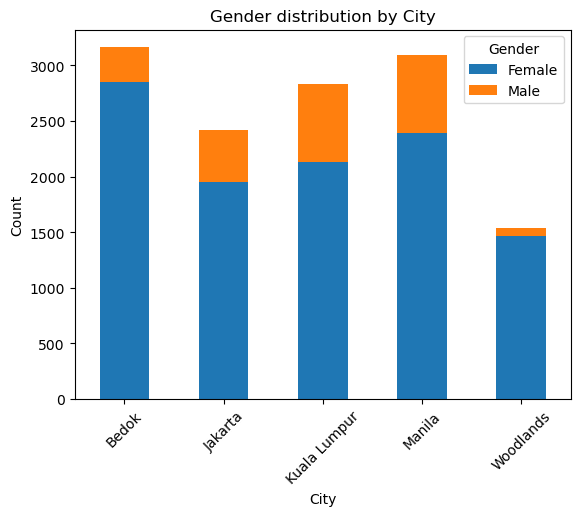

In [71]:
city_gender_counts = df_unique.groupby(['City', 'Gender']).size().unstack()
city_gender_counts.plot(kind = 'bar', stacked = True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Gender distribution by City')
plt.xticks(rotation = 45)
plt.show();

8. Яка динаміка кількості чеків по рокам у кожному з міст? Зробити візуалізацію.

In [72]:
pivot1 = df_unique.pivot_table(index = 'City', columns = 'Year', values = 'Receipt Number', aggfunc = 'count')
pivot1

Year,2016,2017,2018,2019
City,,,,
Bedok,658,774,806,926
Jakarta,519,549,606,745
Kuala Lumpur,555,666,746,869
Manila,580,699,822,993
Woodlands,275,379,459,422


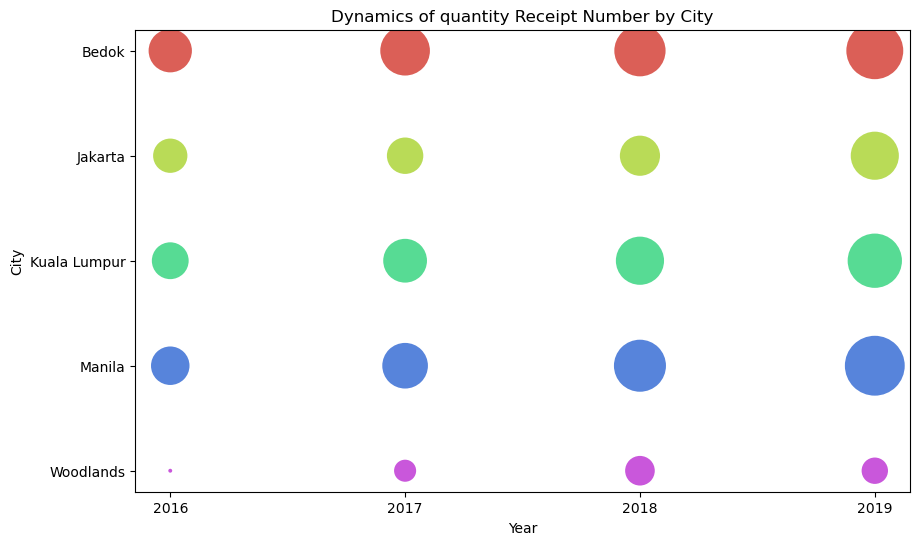

In [79]:
pivot1_reset = pivot1.reset_index()
df_unique_melted = pivot1_reset.melt(id_vars = 'City', var_name = 'Year', value_name = 'Receipt Number')
df_unique_melted['Year'] = pd.to_numeric(df_unique_melted['Year'])
palette = sns.color_palette("hls", len(df_unique_melted['City'].unique()))
color_dict = dict(zip(df_unique_melted['City'].unique(), palette))
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_unique_melted, x = 'Year', y = 'City', size = 'Receipt Number', 
                sizes = (20, 2000), hue = 'City', palette = color_dict, legend = False)
plt.xticks(np.arange(df_melted['Year'].min(), df_melted['Year'].max() + 1, 1))
plt.title('Dynamics of quantity Receipt Number by City')
plt.show();

9. Яку кількість чеків зробили покупці в залежності від статі та вікової групи? Зробити візуалізацію.

Відповідь на дане питання дасть нам інформацію щодо стимулювання продажів саме якої вікової групи згідно статі є нагальним (просідає). Оскільки підхід до кожного окремого клієнта з даних груп є специфічним, таким чином ми можемо краще намалювати портрет нашого цільового покупця якого необхідно стимулювати купувати більше. 

In [74]:
warnings.filterwarnings('ignore', category = DeprecationWarning)
df_unique = df_unique.copy()
df_unique.loc[:, 'Age Group'] = pd.cut(df_unique['Age'], bins=[0, 20, 30, 40, 50, 60, 70],
                                       labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])

pivot2 = df_unique.pivot_table(index = 'Gender', columns = 'Age Group', values = 'Receipt Number', aggfunc = 'count')
pivot2

Age Group,0-20,20-30,30-40,40-50,50-60,60+
Gender,,,,,,
Female,2006,2423,2171,2440,1321,252
Male,394,537,469,422,357,44


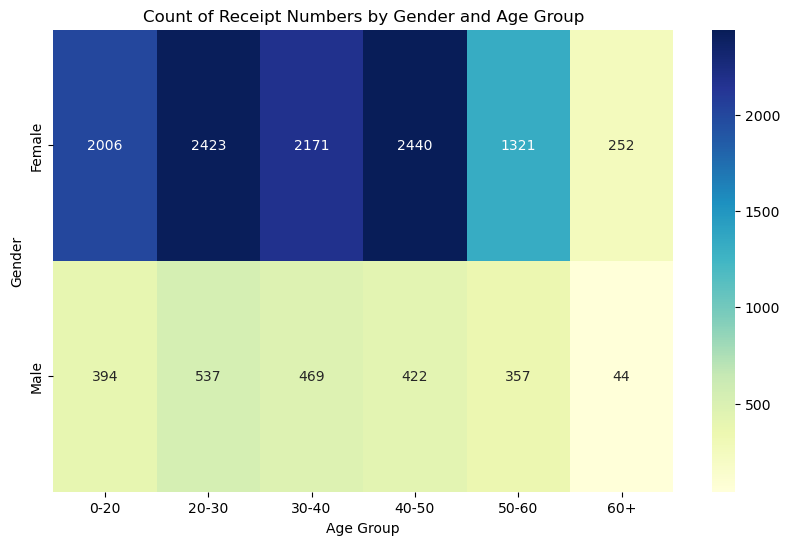

In [76]:
plt.figure(figsize = (10, 6))
sns.heatmap(pivot2, annot = True, fmt = ".0f", cmap = "YlGnBu")
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.title('Count of Receipt Numbers by Gender and Age Group')
plt.show();

10. Яка динаміка загальних сум унікальних чеків в залежності від міста по роках? Зробити візуалізацію.

Для власника бізнесу та топ менеджменту дана інформація може бути цікавою з точки зору яке місто є більш прибутковим, а яке менш. Можливо, необхідно збільшити кількість торгових точок мережі саме у цьому місті, або загалом провести заходи щодо стимулювання продажів у певному місті, або зробити оновлення торгових точок мережі у місті з найменшими продажами тощо.

In [78]:
pivot3 = df_unique.pivot_table(index = ['Year'], columns = ['City'], values = ['Gross Bill Amount'], aggfunc = 'sum')
for city in pivot3.columns.levels[1]:
    pivot3 = pivot3.round({('Gross Bill Amount', city): 2})
pivot3

Gross Bill Amount                                           
City             Bedok   Jakarta Kuala Lumpur    Manila Woodlands
Year                                                             
2016          32922.39  25453.25     25668.34  28933.77  16783.49
2017          35026.40  27971.82     29177.06  34746.54  17592.67
2018          38443.23  29544.06     34551.75  42089.36  20464.31
2019          45789.28  34750.52     42446.80  51346.14  22954.25

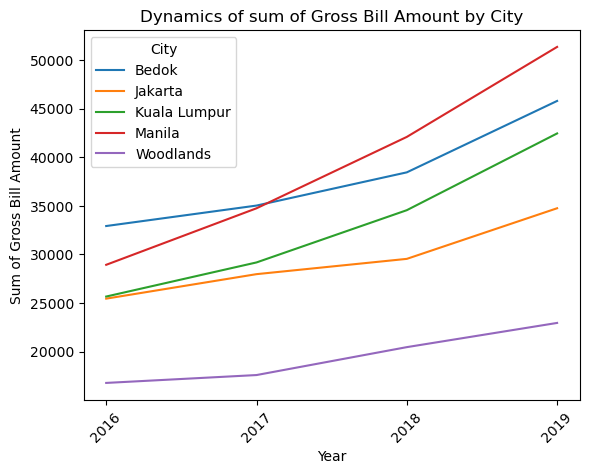

In [80]:
pivot3.columns = pivot3.columns.droplevel(0)
pivot3.plot()
plt.xlabel('Year')
plt.ylabel('Sum of Gross Bill Amount')
plt.title('Dynamics of sum of Gross Bill Amount by City')
plt.xticks(np.arange(min(pivot3.index), max(pivot3.index) + 1, 1), rotation = 45);

11. Категорійний аналіз. Які категорії товарів, що представлені у торговій мережі є високомаржинальні, а які, - низькомаржинальні?

Знаючи категорії товарів, які приносять магазину більше заробітку, а які менше, - можна робити відповідні стимулювальні продажі дії і навпаки. Також можна збільшувати розмір торгової полиці та кількості точок контакту потенційного клієнта до більш високомаржинальних категорій товарів та навпаки.

In [83]:
df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)

Category
Wines, Beers & Spirits       2.131687
Mother & Baby                2.064797
Meat & Seafood               1.938869
Health                       1.761393
Beauty                       1.535053
Frozen                       1.448634
Pet Care                     1.288672
Beverages                    1.091132
Fruit & Vegetable            1.004160
Household                    0.993263
Choco, Snacks, Sweets        0.979813
Bakery & Breakfast           0.919457
Party Supplies               0.899656
Dairy, Chilled & Eggs        0.789334
Kitchen & Dining             0.631523
Rice & Cooking Essentials    0.520843
Name: Profit Margin, dtype: float64

12. Який розподіл популярності категорій товарів в залежності від статі? Зробити візуалізацію.

Дану інформацію можна використовувати категорійним менеджерам для розуміння портрета потенційного клієнта.

Хочу зауважити, що на мою думку, якщо в кожному унікальному чеку повторюється категорія, то це лише підвищує її популярність в загальній картині.

In [88]:
df_grouped = df.groupby(['Receipt Number', 'Category', 'Gender']).size().reset_index(name = 'Counts')
df_grouped['Popularity'] = df_grouped['Counts'] / df_grouped['Counts'].sum() * 100
df_grouped

,Receipt Number,Category,Gender,Counts,Popularity
0,GIJ00001,"Choco, Snacks, Sweets",Male,1,0.001982
1,GIJ00002,"Wines, Beers & Spirits",Male,1,0.001982
2,GIJ00003,Fruit & Vegetable,Female,6,0.011894
3,GIJ00004,Pet Care,Female,4,0.007929
4,GIJ00005,Meat & Seafood,Male,1,0.001982
...,...,...,...,...,...
36478,GSW01533,Rice & Cooking Essentials,Female,1,0.001982
36479,GSW01534,"Dairy, Chilled & Eggs",Female,1,0.001982
36480,GSW01535,Bakery & Breakfast,Female,1,0.001982
36481,GSW01535,Frozen,Female,1,0.001982


In [89]:
df_grouped = df_grouped.groupby(['Category', 'Gender'])['Popularity'].sum().reset_index()
df_grouped

,Category,Gender,Popularity
0,Bakery & Breakfast,Female,11.092830
1,Bakery & Breakfast,Male,2.327195
2,Beauty,Female,8.541638
3,Beauty,Male,1.776121
4,Beverages,Female,3.593871
5,Beverages,Male,0.783000
6,"Choco, Snacks, Sweets",Female,4.900192
7,"Choco, Snacks, Sweets",Male,1.084306
8,"Dairy, Chilled & Eggs",Female,5.566238
9,"Dairy, Chilled & Eggs",Male,1.135846


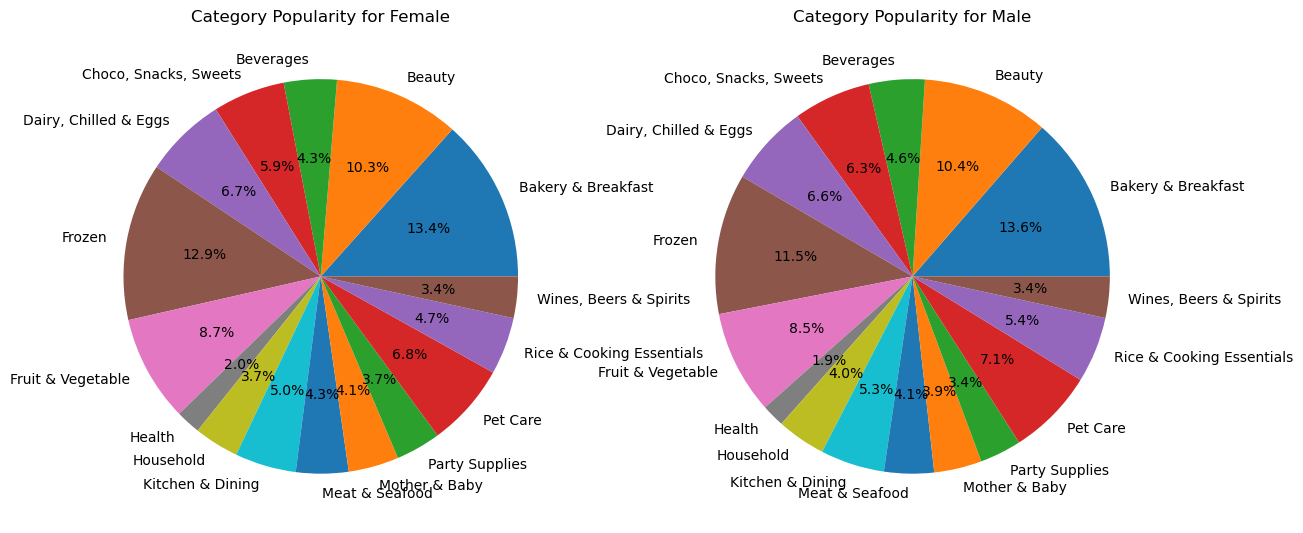

In [90]:
genders = df_grouped['Gender'].unique()

fig, axs = plt.subplots(1, len(genders), figsize = (7*len(genders), 7))

for i, gender in enumerate(genders):
    df_gender = df_grouped[df_grouped['Gender'] == gender]
    axs[i].pie(df_gender['Popularity'], labels = df_gender['Category'], autopct = '%1.1f%%')
    axs[i].set_title('Category Popularity for ' + gender)

plt.show();

13. Зробити загальну візуалізацію популярності категорій товарів серед покупців торгової мережі.

In [91]:
df_grouped = df_grouped.groupby('Category')['Popularity'].sum().reset_index()
df_grouped

,Category,Popularity
0,Bakery & Breakfast,13.420025
1,Beauty,10.317759
2,Beverages,4.376871
3,"Choco, Snacks, Sweets",5.984499
4,"Dairy, Chilled & Eggs",6.702083
5,Frozen,12.672706
6,Fruit & Vegetable,8.662557
7,Health,1.998137
8,Household,3.728666
9,Kitchen & Dining,5.058775


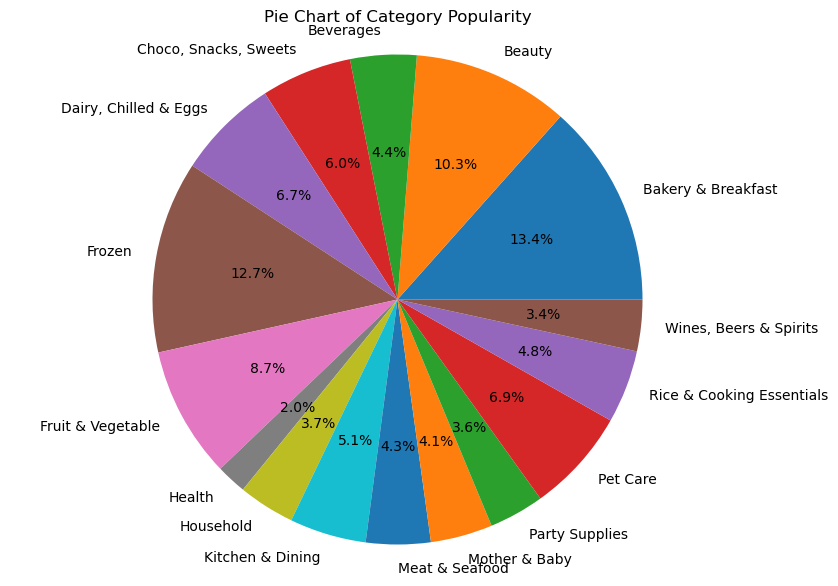

In [98]:
plt.figure(figsize = (10,7))
plt.pie(df_grouped['Popularity'], labels = df_grouped['Category'], autopct = '%1.1f%%')

plt.axis('equal')  
plt.title('Pie Chart of Category Popularity')

plt.show();

14. Яка загальна сума покупок по категоріям в залежності від статі?

Вираження попередньої аналітики у грошах. Яку саме категорію купують чоловіки та жінки та на яку суму. Так як ще у 2-му завданні дійшли висновку, що лише у 65% даних значення стовпця "Net Bill Amount" дорівнюють сумі значень стовпця "Amount", коли кількість позицій у чеку більше однієї, тому створимо окремий розрахунковий стовпець суми з податком, аналог "Gross Bill Amount" розрахований коректно.

In [95]:
df['Amount_GST'] = df['Amount'] * (1 + df['GST'])
pivot4 = df.pivot_table(index = ['Category'], columns = ['Gender'], values = ['Amount_GST'], aggfunc = 'sum')
for gender in pivot4.columns.levels[1]:
    pivot4 = pivot4.round({('Amount_GST', gender): 2})
pivot4

Amount_GST          
Gender                        Female      Male
Category                                      
Bakery & Breakfast          47787.83   9907.76
Beauty                      71678.58  14245.57
Beverages                   24179.46   5168.68
Choco, Snacks, Sweets       23100.19   5187.40
Dairy, Chilled & Eggs       31917.87   6548.62
Frozen                      68388.09  12230.72
Fruit & Vegetable           33129.91   6759.82
Health                      19060.61   3073.59
Household                   22415.90   4936.43
Kitchen & Dining            12867.55   2702.55
Meat & Seafood              35180.27   7091.21
Mother & Baby               33217.69   6480.39
Party Supplies              11574.92   2267.90
Pet Care                    31719.98   7045.76
Rice & Cooking Essentials   11211.75   2731.73
Wines, Beers & Spirits      31408.39   6187.95

15. Яку кількість покупок по категоріям товарів було зроблено в торговій мережі в залежності від часу доби? Зробити візуалізацію.

Додаткова інформація на рахунок динаміки продажів категорії в залежності від часу. Ще одні данні для прийняття рішень на основі аналітики даних.

In [100]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)

In [104]:
pivot5 = df.pivot_table(index = 'Category', columns = 'Hour', values = 'Receipt Number', aggfunc = 'count')
pivot5

Hour,10,11,12,13,14,15,16,17,18,19,20,21
Category,,,,,,,,,,,,
Bakery & Breakfast,551,548,578,588,542,572,579,504,559,602,626,521
Beauty,450,411,421,474,426,469,407,419,451,418,467,392
Beverages,166,161,180,171,155,222,193,167,199,213,194,187
"Choco, Snacks, Sweets",284,241,243,254,256,265,224,261,264,225,249,253
"Dairy, Chilled & Eggs",253,256,297,290,288,299,300,252,295,296,301,254
Frozen,528,510,509,528,538,548,563,490,526,529,564,560
Fruit & Vegetable,362,407,367,422,326,318,323,388,303,375,356,423
Health,102,81,83,101,68,79,85,69,97,85,85,73
Household,150,149,163,133,156,157,152,144,178,152,183,164


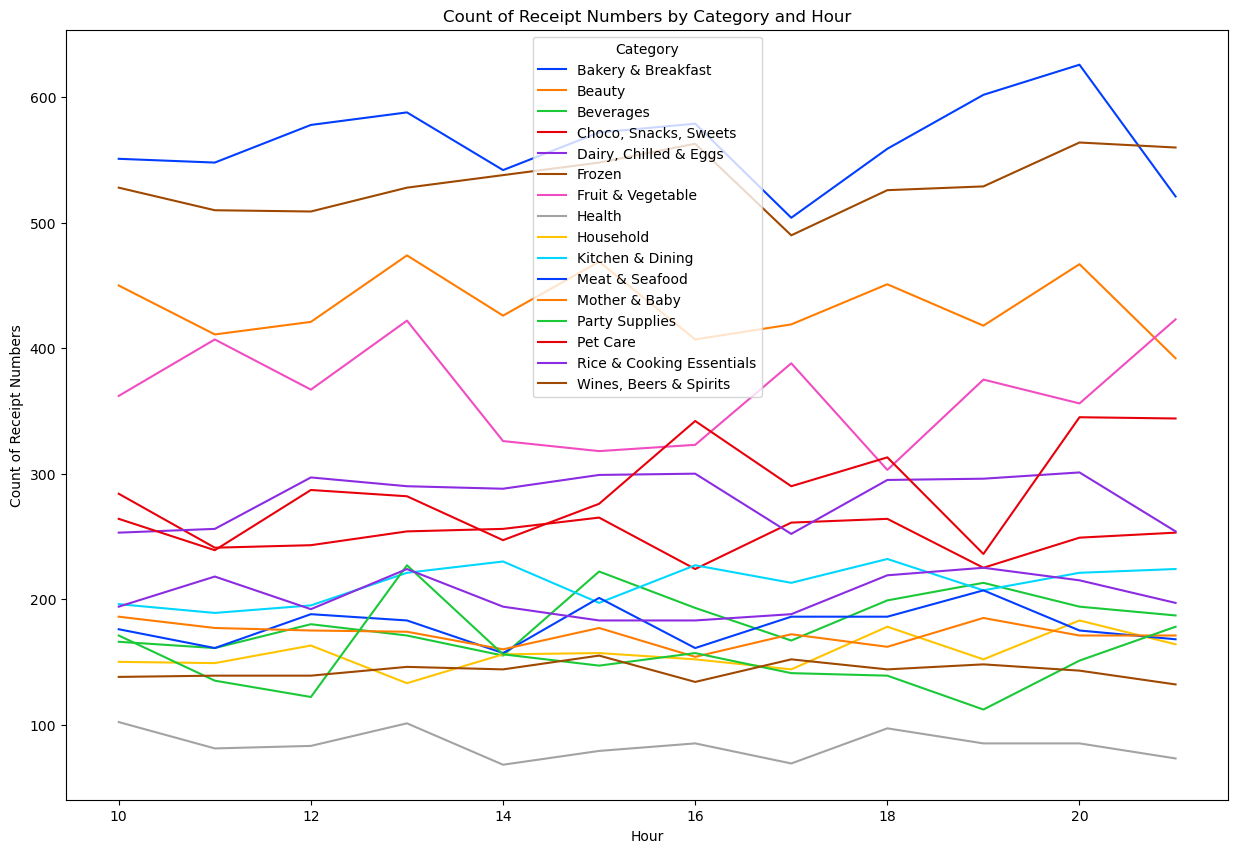

In [105]:
pivot5_reset = pivot5.reset_index()
pivot5_melted = pivot5_reset.melt(id_vars = 'Category', var_name = 'Hour', value_name = 'Count')
plt.figure(figsize = (15, 10))
sns.lineplot(x = 'Hour', y = 'Count', hue = 'Category', data = pivot5_melted, palette = 'bright')
plt.xlabel('Hour')
plt.ylabel('Count of Receipt Numbers')
plt.title('Count of Receipt Numbers by Category and Hour')
plt.show();

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**